# 常用Python数据科学库简明指南

## 基础数据处理库

### 1. `numpy` (np)
- **名称含义**: Numerical Python
- **记忆方法**: "num" + "py" → 数字Python
- **作用**: 提供高性能的多维数组对象和数学函数，是Python科学计算的基础

### 2. `pandas` (pd)
- **名称含义**: Panel Data（面板数据）
- **记忆方法**: 熊猫(panda) → "盘"数据
- **作用**: 提供DataFrame和Series数据结构，用于数据清洗、分析和处理

## 数据可视化库

### 3. `matplotlib.pyplot` (plt)
- **名称含义**: 绘图库
- **记忆方法**: "mat plot lib" → 数学绘图库
- **作用**: Python最基础的绘图库，功能强大但语法稍复杂

### 4. `seaborn` (sns)
- **名称含义**: 基于matplotlib的统计可视化库
- **记忆方法**: 海豹(seaborn) → 海洋主题可视化
- **作用**: 提供更美观、更简单的统计图表接口

## Scikit-learn机器学习库

### 5. `sklearn.linear_model` - 线性模型
- **LinearRegression**: 普通线性回归
- **Ridge**: 岭回归（L2正则化）
- **Lasso**: Lasso回归（L1正则化）
- **ElasticNet**: 弹性网络（L1+L2正则化）
- **记忆方法**: 
  - Ridge(岭) → L2 → 避免过拟合
  - Lasso(套索) → L1 → 特征选择
  - Elastic(弹性) → 结合两者

### 6. `sklearn.tree` - 树模型
- **DecisionTreeRegressor**: 决策树回归

### 7. `sklearn.ensemble` - 集成方法
- **RandomForestRegressor**: 随机森林回归
- **GradientBoostingRegressor**: 梯度提升回归
- **记忆方法**: 
  - Forest(森林) → 多棵树 → 随机森林
  - Boosting(提升) → 逐步改进 → 梯度提升

### 8. 预处理和流程工具
- **ColumnTransformer**: 列转换器（对不同列应用不同处理）
- **Pipeline**: 流水线（将多个步骤串联）
- **SimpleImputer**: 简单填充器（处理缺失值）
- **OneHotEncoder**: 独热编码（分类变量编码）
- **RobustScaler**: 鲁棒缩放（对异常值不敏感的标准化）

### 9. 模型选择和评估
- **KFold**: K折交叉验证
- **RandomizedSearchCV**: 随机搜索交叉验证
- **train_test_split**: 训练测试分割
- **mean_squared_error**: 均方误差
- **mean_absolute_error**: 平均绝对误差
- **r2_score**: R²分数

## 高性能梯度提升库

### 10. `XGBoost` (XGBRegressor)
- **名称含义**: eXtreme Gradient Boosting
- **记忆方法**: X → eXtreme(极限) + GBoost(梯度提升)
- **作用**: 优化的梯度提升算法，速度快、效果好

### 11. `LightGBM` (LGBMRegressor)
- **名称含义**: Light Gradient Boosting Machine
- **记忆方法**: Light(轻量) + GBM(梯度提升机)
- **作用**: 微软开发的轻量级梯度提升框架，速度快、内存占用少

### 12. `CatBoost` (CatBoostRegressor)
- **名称含义**: Categorical Boosting
- **记忆方法**: Cat → Categorical(分类) + Boost(提升)
- **作用**: 专门处理分类特征，自动处理类别变量，无需独热编码

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, RandomizedSearchCV,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


import warnings
warnings.filterwarnings('ignore')

In [21]:
train = pd.read_csv('projects/2-HousePrice/data/train.csv')
test = pd.read_csv('projects/2-HousePrice/data/test.csv')

In [22]:
target = 'SalePrice'

- sns：seaborn 库的缩写，专门用来画美观的统计图表；
- histplot：是 seaborn 的直方图绘制函数，作用是统计train[target]中不同数值出现的频次，并用柱状图展示；
- train[target]：train是你的数据集（比如 pandas 的 DataFrame），target是你要分析的目标变量名（比如房价、销量等），合起来就是取数据集中目标变量的所有值；
- kde=True：kde是核密度估计（简单理解为 “平滑曲线”），设置为True会在直方图上叠加一条连续的曲线，更清晰地展示数值的分布趋势。

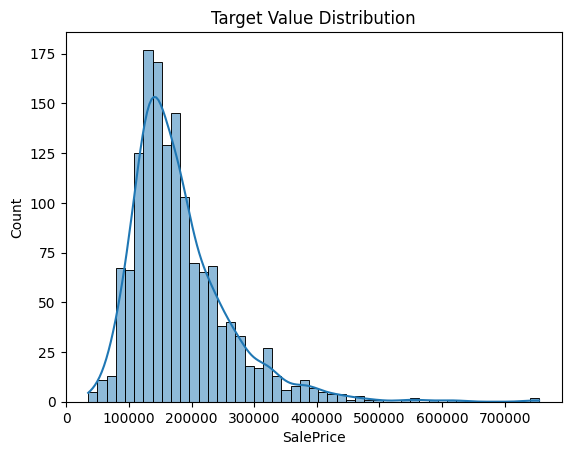

In [23]:
sns.histplot(train[target], kde=True)
plt.title("Target Value Distribution")
plt.show()

1. train.describe().columns - 获取数值型列的描述统计
   - describe() 方法只会返回数值列
   - 但仅限于能计算统计量的数值列
   - 问题：如果某些数值列全是NaN或常量值，会被排除
2. 选择数值列并计算相关性
   - 筛选出这些数值列
   - 计算所有数值列之间的相关系数矩阵
   - 选择目标列 'SalePrice' 的相关性
1. 排序并选取Top 10
   - 降序排列（相关性从高到低）
   - [1:10] 排除第一个（目标列自身，相关性=1.0）
   - 取第2-11个（实际是前10个相关特征）
⚠️ 潜在问题：
   - 不完整：可能遗漏某些数值列
   - 不稳定：数据集变化时，describe() 返回的列可能变化
   - 不直观：链式操作难以调试

In [24]:
# Top 10 highly correlated columns
impact_cols = train[train.describe().columns].corr()['SalePrice'].sort_values(ascending = False)[1:10]
impact_cols

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

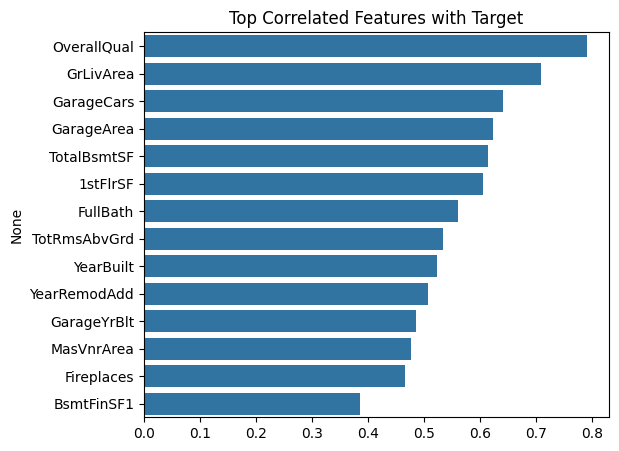

In [25]:
impact_cols = (
    train.select_dtypes(include='number')
         .corr()[target]
         .sort_values(ascending=False)[1:15]
)

plt.figure(figsize=(6,5))
sns.barplot(x=impact_cols.values, y=impact_cols.index)
plt.title("Top Correlated Features with Target")
plt.show()

1. 为什么用 log1p 而不是 log？
- log1p = log(1 + x)
- 安全处理0值
- 数学上更稳定
1. 对数变换的好处：
- 压缩极端值，减少异常值影响
- 使分布更接近正态
- 稳定方差，满足线性模型假设

In [26]:
# making values in same ranges
y = train['SalePrice'] # 原始目标变量
y_log = np.log1p(train['SalePrice']) # 对目标变量进行对数变换
train.drop(columns=['SalePrice'],inplace=True) # 删除原始目标变量列

In [27]:
test_ids = test['Id'] # 保存测试集的Id列以便提交结果

In [28]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


合并训练集和测试集进行统一预处理，是避免数据不一致性的标准做法，但必须小心处理目标变量，防止数据泄露。

In [29]:
df = pd.concat([train,test],axis=0).reset_index(drop=True) # 合并训练集和测试集以便统一处理
df.drop(columns=['Id'],inplace=True) # 删除Id列，因为它对模型没有实际意义
df.head() # 查看合并后的数据集结构

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [30]:
df.describe().T # 查看数值型特征的统计信息并转置

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


| 统计量 | 含义           | 用途               |
|--------|----------------|--------------------|
| count  | 非空值数量     | 检查缺失情况       |
| unique | 唯一值数量     | 判断多样性         |
| top    | 出现最频繁的值 | 了解主导类别       |
| freq   | top值的出现次数 | 计算分布比例       |

In [31]:
df.describe(exclude=np.number).T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


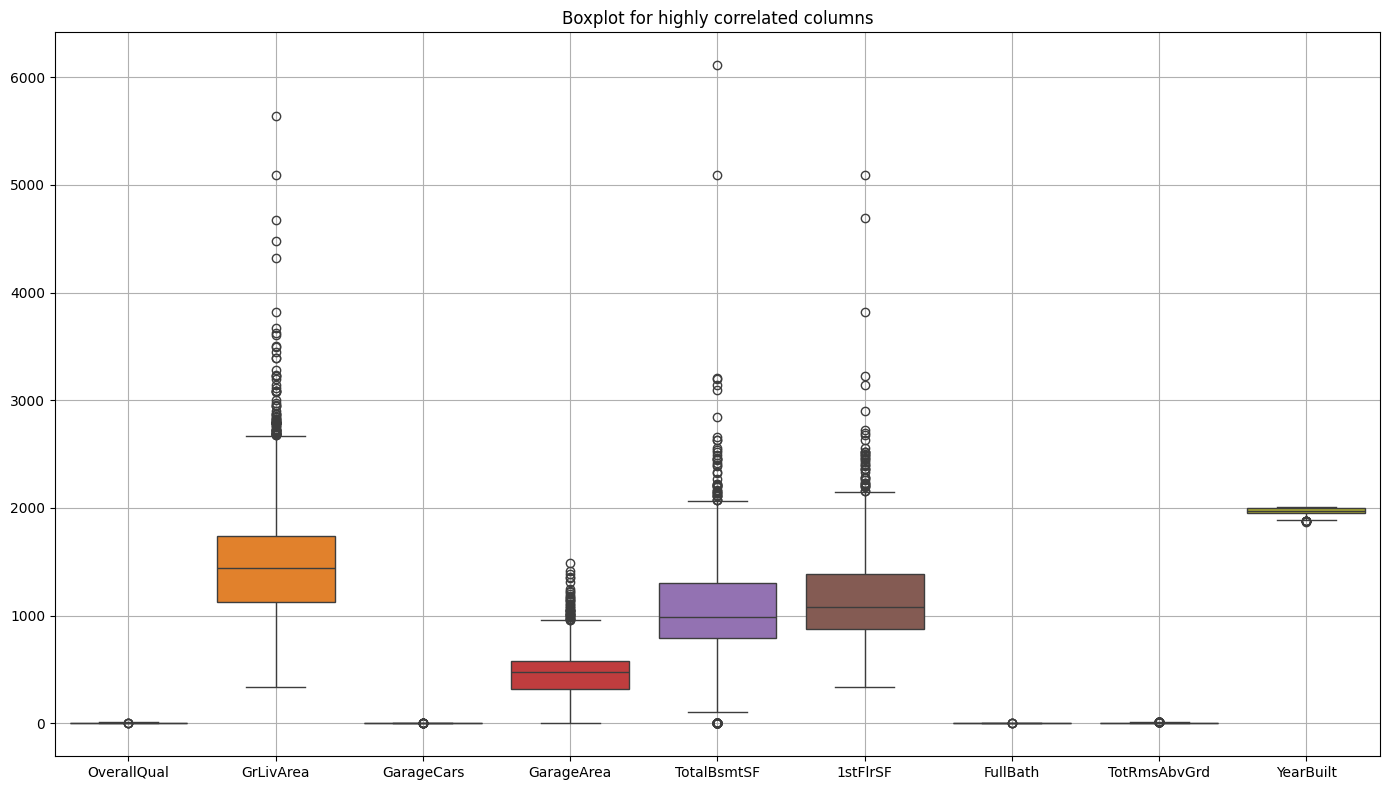

In [32]:
# 导入必要的库
import matplotlib.pyplot as plt
import seaborn as sns

# 定义要绘制的列
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

# 创建一个图形，设置图形大小为 14x8 英寸
plt.figure(figsize=(14, 8))

# 使用 Seaborn 库绘制箱线图，数据源为 df 数据框中指定的列
sns.boxplot(data=df[cols])

# 设置图形标题
plt.title('Boxplot for highly correlated columns')

# 添加网格线以提高可读性
plt.grid()

# 调整布局以避免重叠
plt.tight_layout()

# 显示图形
plt.show()


这段代码的目的是为 cols 列表中的每一列绘制直方图，直方图可以帮助我们理解每个特征的分布情况。通过叠加的 KDE 曲线，我们可以更直观地看到数据的密度分布。每个直方图都将单独显示，便于逐一分析每个特征。

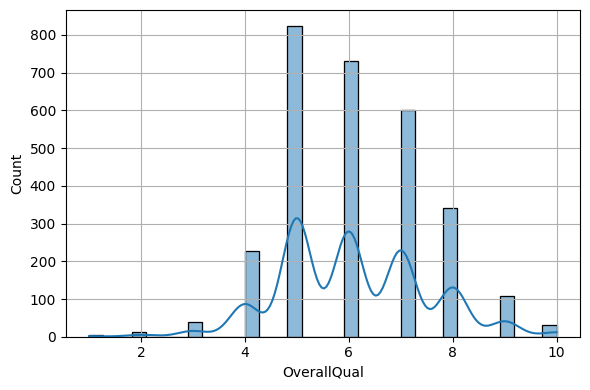

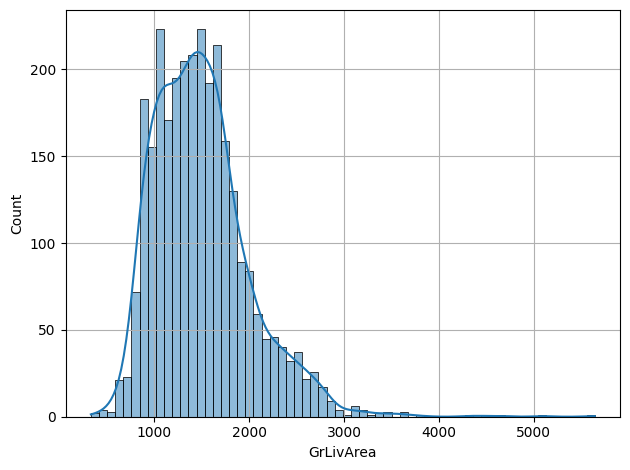

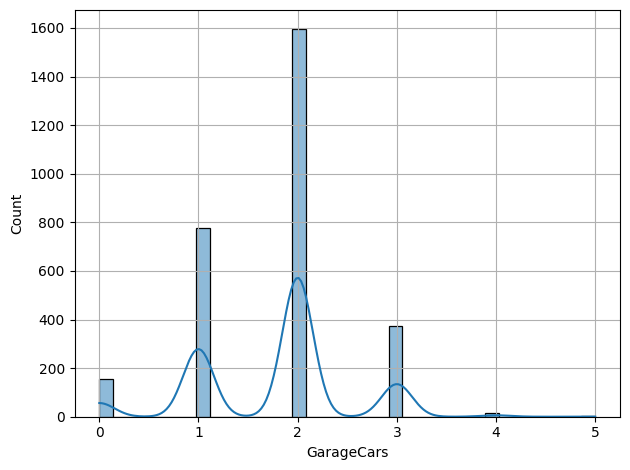

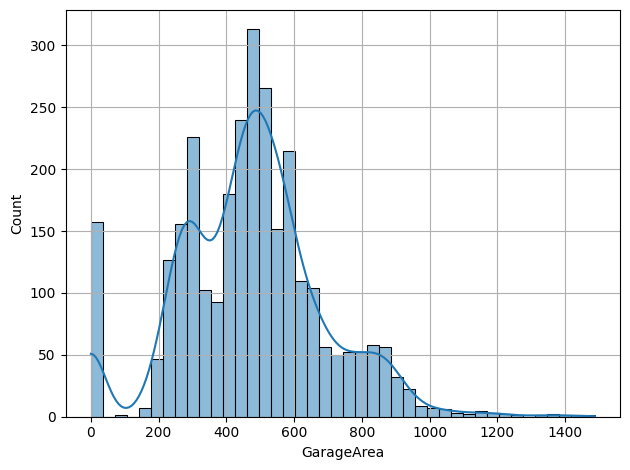

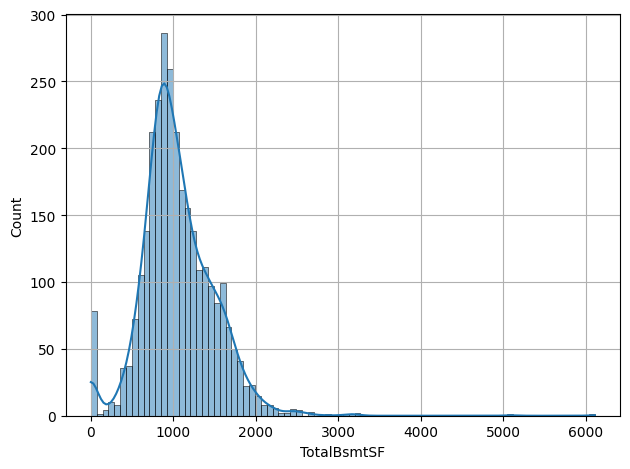

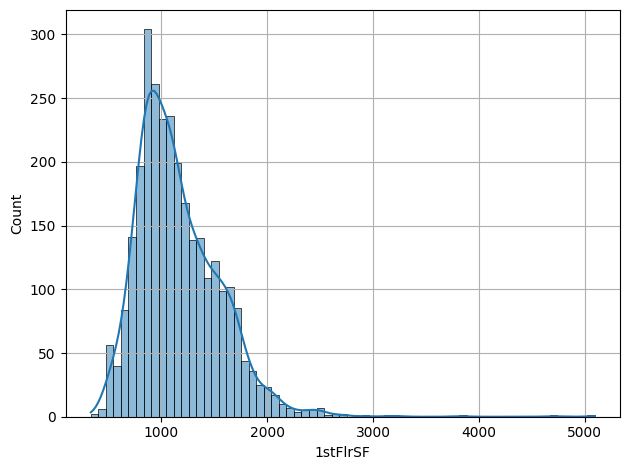

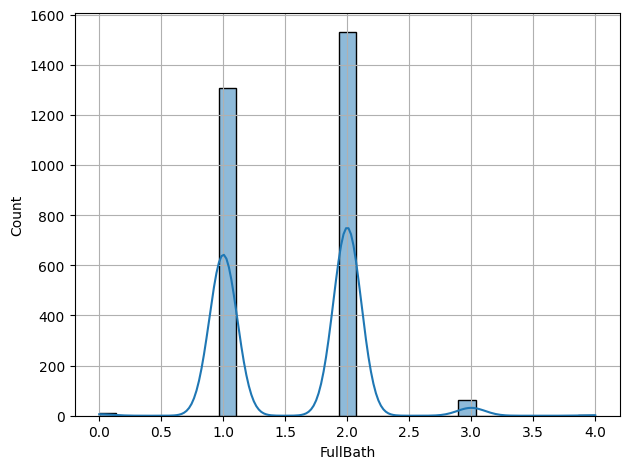

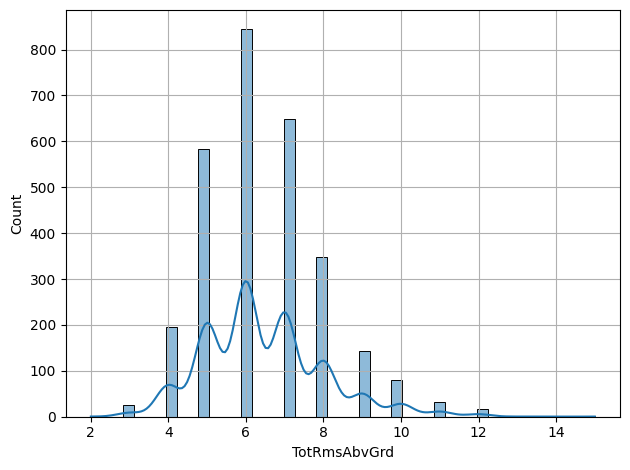

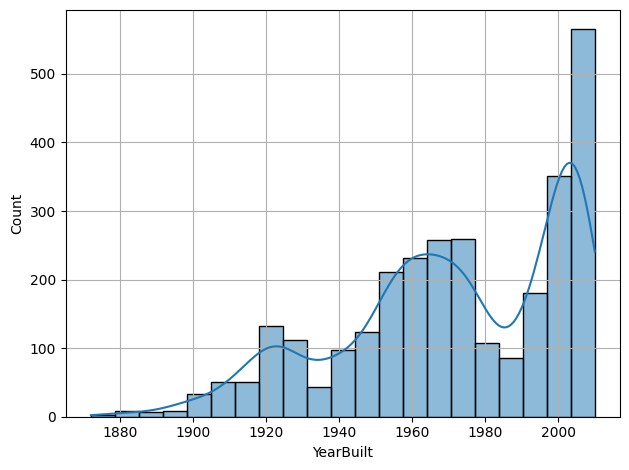

In [33]:
plt.figure(figsize=(6,4))
for i in cols:
    sns.histplot(data=df,x=i,kde=True) # 绘制每个列的直方图和核密度估计曲线
    plt.grid() # 添加网格线以提高可读性
    plt.tight_layout()
    plt.show()

In [34]:
for col in df.select_dtypes(include=np.number).columns:
    print(f'{df[col].name} -> {df[col].skew()}')# 输出每个数值型特征的偏度值，以评估数据分布的偏斜程度

MSSubClass -> 1.3761646373261713
LotFrontage -> 1.5032778146412304
LotArea -> 12.829024853018762
OverallQual -> 0.19721180528040133
OverallCond -> 0.5706053117352524
YearBuilt -> -0.6001139748696814
YearRemodAdd -> -0.45125229728739846
MasVnrArea -> 2.6025885122682517
BsmtFinSF1 -> 1.425722287785458
BsmtFinSF2 -> 4.1474557017396885
BsmtUnfSF -> 0.9198236977423032
TotalBsmtSF -> 1.1628824745982715
1stFlrSF -> 1.4703601055379227
2ndFlrSF -> 0.8621178325657642
LowQualFinSF -> 12.094977192517302
GrLivArea -> 1.2700104075191514
BsmtFullBath -> 0.6240621985365326
BsmtHalfBath -> 3.9320182078879196
FullBath -> 0.16769191818882379
HalfBath -> 0.6949236492716564
BedroomAbvGr -> 0.32649214927079917
KitchenAbvGr -> 4.304466641562935
TotRmsAbvGrd -> 0.7587568676624701
Fireplaces -> 0.733871770878103
GarageYrBlt -> -0.38215016096981613
GarageCars -> -0.21837276655710502
GarageArea -> 0.24130051733383068
WoodDeckSF -> 1.8433802126628294
OpenPorchSF -> 2.5364173160468444
EnclosedPorch -> 4.0059500705

创建组合特征 + 处理数据偏斜  
🔧 新增特征（5类）
1. 面积组合
   - df['TotalSF'] = 地下室 + 一层 + 二层  # 总居住面积
   - df['TotalBath'] = 全卫*1 + 半卫*0.5  # 总卫生间数（加权）
   - df['TotalPorchSF'] = 各类型门廊面积和
2. 房屋年龄特征
   - df['HouseAge'] = 销售年份 - 建造年份
   - df['RemodAge'] = 销售年份 - 改建年份
   - df['IsRemodeled'] = 是否改建过（0/1）
3. 偏斜校正（自动化）
   - 对偏度>0.75的数值列进行log1p变换

In [35]:
def add_features(data):
    df = data.copy()
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)

    # skew fix
    for col in df.select_dtypes(include=np.number).columns:
        if abs(df[col].skew()) > 0.75:
            df[col] = np.log1p(df[col])

    return df

df = add_features(df)

In [36]:
for col in df.select_dtypes(include=np.number).columns:
    print(f'{df[col].name} -> {df[col].skew()}')
    # 输出校正后每个数值型特征的偏度值，以评估数据分布的偏斜程度

MSSubClass -> 0.24528354240621622
LotFrontage -> -0.857099124095863
LotArea -> -0.505010100221913
OverallQual -> 0.19721180528040133
OverallCond -> 0.5706053117352524
YearBuilt -> -0.6001139748696814
YearRemodAdd -> -0.45125229728739846
MasVnrArea -> 0.5242793021941514
BsmtFinSF1 -> -0.6179623522140162
BsmtFinSF2 -> 2.4631377046699123
BsmtUnfSF -> -2.1597363529352176
TotalBsmtSF -> -4.983344759341152
1stFlrSF -> 0.06486101674723506
2ndFlrSF -> 0.305206076056322
LowQualFinSF -> 8.56209088801536
GrLivArea -> 0.013194362973261287
BsmtFullBath -> 0.6240621985365326
BsmtHalfBath -> 3.775149413688708
FullBath -> 0.16769191818882379
HalfBath -> 0.6949236492716564
BedroomAbvGr -> 0.32649214927079917
KitchenAbvGr -> 3.5221608468499483
TotRmsAbvGrd -> 0.03512504311429316
Fireplaces -> 0.733871770878103
GarageYrBlt -> -0.38215016096981613
GarageCars -> -0.21837276655710502
GarageArea -> 0.24130051733383068
WoodDeckSF -> 0.15811426310497517
OpenPorchSF -> -0.04181879673885529
EnclosedPorch -> 1.96

In [37]:
num_cols = df.select_dtypes(['int64','float64']).columns # 获取数值型特征的列名列表
cat_cols = df.select_dtypes(['object']).columns # 获取类别型特征的列名列表

1. 鲁棒缩放（Robust Scaling）  
鲁棒缩放是一种数据标准化方法，主要用于减少异常值对数据缩放的影响。它通过以下方式进行缩放：  
• 计算数据的中位数（median）和四分位数（interquartile range, IQR）。  
• 将每个特征的值减去中位数，然后除以四分位数范围（即上四分位数与下四分位数之差）。  
2. 独热编码（One-Hot Encoding）  
独热编码是一种将类别型变量转换为数值形式的方法。它的基本思路是将每个类别值转换为一个新的二进制列（0或1）。  
3. 切片（Slicing）及其作用  
切片是从数据结构（如数据框、数组等）中提取特定部分的操作。在这里，切片用于从数据框 df 中提取特征集 X 和测试集特征 X_test。  

In [38]:
num_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
]) # 数值型特征的预处理管道：先使用中位数填充缺失值，然后进行鲁棒缩放以减少异常值的影响

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
]) # 类别型特征的预处理管道：先使用众数填充缺失值，然后进行独热编码以转换为数值形式
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
]) # 将数值型和类别型特征的预处理管道组合成一个列转换器，以便在模型训练中统一处理不同类型的特征
X = df.iloc[:len(y)] # 从合并后的数据框中提取训练集特征，使用 iloc 根据目标变量 y 的长度进行切片
X_test = df.iloc[len(y):] # 从合并后的数据框中提取测试集特征，使用 iloc 从目标变量 y 的长度开始切片到末尾

# 机器学习模型核心原理与设计思想
## 一、线性模型家族：用「直线/超平面」拟合数据
**核心思想**：假设特征和目标值（如房价SalePrice）之间存在线性关系，即 $y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$（y是预测值，w是特征权重，b是截距），目标是找到最优的w和b，让预测值尽可能接近真实值。

| 模型         | 核心步骤                                                                 | 设计内涵                                                                 |
|--------------|--------------------------------------------------------------------------|--------------------------------------------------------------------------|
| 线性回归     | 1. 用最小二乘法最小化「预测值-真实值」的平方和<br>2. 直接输出权重w和截距b | 作为「基线模型」，无额外约束，建立最简单的预测基准，后续模型均与之对比   |
| Ridge回归    | 1. 基础逻辑同线性回归<br>2. 增加L2惩罚项：$alpha × \sum(w_i^2)$，最小化「平方误差+L2惩罚」 | 1. L2惩罚压缩权重大小（不置0），降低共线性特征的影响<br>2. alpha=1.0：中等强度正则化，平衡过拟合与欠拟合 |
| Lasso回归    | 1. 基础逻辑同线性回归<br>2. 增加L1惩罚项：$alpha × \sum(|w_i|)$，最小化「平方误差+L1惩罚」 | 1. L1惩罚实现特征稀疏性（不重要特征权重置0），自动做特征选择<br>2. alpha=0.0005：弱惩罚，保留更多有用特征 |
| ElasticNet   | 1. 惩罚项=alpha × [l1_ratio×$\sum(|w_i|)$ + (1-l1_ratio)×$\sum(w_i^2)$]<br>2. 最小化「平方误差+混合惩罚」 | 1. l1_ratio=0.9：90% L1（特征选择）+10% L2（稳定权重）<br>2. alpha=0.0005：弱惩罚，兼顾特征选择与模型稳定性 |

## 二、树模型家族：用「如果-那么」规则分割数据
**核心思想**：把复杂预测问题拆分成一系列简单「是非题」（如「面积>100㎡？」），通过层层分割将数据分成多个小群体，每个群体的目标值更单一，最终用群体均值/投票做预测。

| 模型         | 核心步骤                                                                 | 设计内涵                                                                 |
|--------------|--------------------------------------------------------------------------|--------------------------------------------------------------------------|
| 决策树       | 1. 选最优分割点（让分割后数据差异最大）<br>2. 递归分割直到max_depth=10<br>3. 最终群体均值为预测值 | max_depth=10：限制树深度，避免过深分割导致过拟合；单棵树易记噪音，泛化能力弱 |
| 随机森林     | 1. 随机抽样（数据+特征）训练单棵决策树<br>2. 训练n_estimators=500棵不同决策树<br>3. 预测时取均值/投票 | 1. 随机性抵消单棵树偏差，降低过拟合<br>2. n_estimators=500：平衡效果与训练速度 |
| 梯度提升     | 1. 先训练简单树，计算预测误差<br>2. 训练新树拟合误差，结果×learning_rate累加<br>3. 重复修正误差 | 1. learning_rate=0.03：小步慢走，避免单棵树误差被放大，稳定收敛<br>2. 核心是「加法模型」，逐步补短板，精度高于随机森林 |

## 三、现代梯度提升框架：优化版梯度提升
**核心思想**：在梯度提升基础上做工程优化（并行计算、特征分桶、类别特征处理），核心逻辑仍为「逐步修正误差」，但更高效、适配实际数据。

| 模型         | 核心改进                                                                 | 设计内涵                                                                 |
|--------------|--------------------------------------------------------------------------|--------------------------------------------------------------------------|
| XGBoost      | 1. 加入正则化惩罚树复杂度<br>2. 支持并行计算+自动处理缺失值              | n_estimators=3000 + max_depth=6：多棵浅树（3000棵）保证学习充分，浅层（6层）控制复杂度，避免过拟合 |
| LightGBM     | 1. 直方图分桶替代特征排序，减少计算量<br>2. 内存占用低，训练速度数倍提升 | n_estimators=4000：树结构更轻量，可用更多树提升效果，且训练时间仍可控     |
| CatBoost     | 1. 自动处理类别特征，无需手动编码<br>2. 减少类别特征偏置                  | iterations=3000：等价于n_estimators，多棵浅树保证效果，降低类别特征预处理成本 |

## 四、参数选择核心逻辑
| 参数                | 取值范围       | 选择逻辑                                                                 |
|---------------------|----------------|--------------------------------------------------------------------------|
| n_estimators/iterations（树数量） | 3000-4000      | 数量足够多才能充分学习数据规律；「浅树+多数量」比「深树+少数量」更稳定    |
| learning_rate（学习率）| 0.01-0.03      | 太小需更多树，太大易跳过最优解；0.03是「小步稳走」的最优折中              |
| max_depth（树深度） | 3-15（常用6-10） | 太小欠拟合（学不到规律），太大过拟合（记噪音）；6-10是工业界经验最优区间   |
| 随机种子            | 42             | 固定随机性，保证每次训练结果一致，方便调试和复现                         |

## 核心总结
1. **线性模型**：核心是「拟合线性关系+正则化控复杂度」，L1做特征选择，L2稳权重，ElasticNet兼顾两者；
2. **树模型**：核心是「分割数据+集成学习」，随机森林靠投票稳效果，梯度提升靠修正误差提精度；
3. **现代梯度提升框架**：核心是「工程优化+多浅树策略」，XGBoost快且准，LightGBM更轻量，CatBoost适配类别特征；
4. **参数选择**：用「更多浅树+小学习率」平衡效果、速度、过拟合，是工业界通用经验。

In [39]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.0005),
    "ElasticNet": ElasticNet(alpha=0.0005, l1_ratio=0.9),
    
    "DecisionTree": DecisionTreeRegressor(
        max_depth=10, min_samples_leaf=10, random_state=42
    ),
    
    "RandomForest": RandomForestRegressor(
        n_estimators=500, max_depth=15, min_samples_leaf=5,
        n_jobs=-1, random_state=42
    ),
    
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.03, max_depth=3, random_state=42
    ),
    
    "XGBoost": XGBRegressor(
        n_estimators=3000, max_depth=6, learning_rate=0.01,
        subsample=0.7, colsample_bytree=0.7,
        objective="reg:squarederror", random_state=42, n_jobs=-1
    ),
     "LightGBM": LGBMRegressor(
        n_estimators=4000, learning_rate=0.01,
        num_leaves=64, subsample=0.7, colsample_bytree=0.7,
        random_state=42,min_child_samples=5,min_split_gain=0.0
    ),
    
    "CatBoost": CatBoostRegressor(
        iterations=3000, learning_rate=0.03, depth=8,
        loss_function='RMSE', random_seed=42, verbose=0
    )
}

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_tr, y_tr)
    preds_log = pipe.predict(X_val)

    r2 = r2_score(y_val, preds_log)
    rmsle = np.sqrt(mean_squared_error(y_val, preds_log))
    print(f"{name}: RMSLE = {rmsle:.5f}")
    results[name] = r2

Linear: RMSLE = 0.12367
Ridge: RMSLE = 0.12683
Lasso: RMSLE = 0.12349
ElasticNet: RMSLE = 0.12309
DecisionTree: RMSLE = 0.18206
RandomForest: RMSLE = 0.15014
GradientBoosting: RMSLE = 0.13519
XGBoost: RMSLE = 0.13293
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3936
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 235
[LightGBM] [Info] Start training from score 12.030658
LightGBM: RMSLE = 0.13676
CatBoost: RMSLE = 0.13167


这是LightGBM训练时的技术日志，不是错误信息。它告诉你：1）自动选择了按行并行的计算方式（因为你有1168行数据和235个特征，这样更快）；2）数据被分成了3936个离散的"桶"以加速训练；3）训练从房价对数值的平均值12.03开始。这些都是正常的训练过程反馈，说明模型正在正确初始化并运行。如果你觉得这些信息太多，可以在创建模型时设置`silent=True`来关闭。

In [41]:
 results

{'Linear': 0.9180363104099648,
 'Ridge': 0.9138034353282569,
 'Lasso': 0.9182792039872157,
 'ElasticNet': 0.9188137994857773,
 'DecisionTree': 0.8223719549307422,
 'RandomForest': 0.8792089408566521,
 'GradientBoosting': 0.9020587913601407,
 'XGBoost': 0.9053070367316515,
 'LightGBM': 0.8997757125768231,
 'CatBoost': 0.9070904086803578}

# 模型结果解读指南

## 📊 核心指标含义
1. RMSLE（根均方对数误差）
   - 值越小越好：表示预测越准确
   - 范围：0 是完美，>0.2 可能有问题
   - 你的结果：0.12-0.18，算不错
2. R²分数（决定系数）
   - 值越大越好：表示模型解释了多少数据变化
   - 范围：0-1，0.9+ 非常好
   - 你的结果：0.82-0.92，很好

## 🏆 模型表现排名（从好到差）
### 第1梯队：表现最佳 ✅

| 模型       | RMSLE   | R²    | 说明   |
|------------|---------|-------|--------|
| ElasticNet | 0.12309 | 0.919 | 冠军   |
| Lasso      | 0.12349 | 0.918 | 亚军   |
| Linear     | 0.12367 | 0.918 | 季军   |

### 第2梯队：表现良好 👍

| 模型             | RMSLE   | R²    | 说明           |
|------------------|---------|-------|----------------|
| CatBoost         | 0.13167 | 0.907 | 最好的集成模型 |
| XGBoost          | 0.13293 | 0.905 | 表现稳定       |
| GradientBoosting | 0.13519 | 0.902 | 传统提升树     |

### 第3梯队：表现一般 ⚠️

| 模型         | RMSLE   | R²    | 说明                 |
|--------------|---------|-------|----------------------|
| LightGBM     | 0.13676 | 0.900 | 需要调参             |
| RandomForest | 0.15014 | 0.879 | 树模型基础款         |
| DecisionTree | 0.18206 | 0.822 | 垫底（单棵树太简单） |

## 🔍 关键发现
1. 反直觉的结果
   - 简单模型 > 复杂模型
   - 线性模型（前三名）击败了所有树模型
   - 说明你的数据可能线性关系很强
2. 模型类型对比
   ```python
   # 平均表现对比
   线性模型平均R²: 0.917
   集成树模型平均R²: 0.895  # 比线性差

# 模型训练流程（CV+OOF + XGBoost）
## 1. 第一步：定义通用的 CV+OOF 训练函数 `run_cv_oof`
- **核心目的**：封装一套「可复用」的 5 折交叉验证流程，不局限于 XGBoost—— 只要是回归模型（比如 Lasso、随机森林），都能传入这个函数完成训练、验证和预测；
- **关键动作**：
  1. 初始化 KFold 交叉验证器（固定随机种子、打乱数据）；
  2. 初始化 OOF 数组（评估模型）和测试集预测数组（输出结果）；
  3. 逐折训练：拼接「预处理管道 + 模型」的 Pipeline，避免数据泄露；
  4. 计算并返回 RMSLE 评分、OOF 预测值、测试集预测值。

## 2. 第二步：初始化 XGBoost 具体模型 `xgb_base`
- **核心目的**：定义你要训练的「具体模型」，设置 XGBoost 的专属参数（比如树的数量、深度、学习率、GPU 加速等）；
- **关键动作**：用`XGBRegressor`指定回归任务的参数，比如`n_estimators=3000`（树的数量）、`device='cuda'`（GPU 加速）、`random_state=42`（保证可复现）。

## 3. 第三步：调用函数训练 XGBoost 模型
- **核心目的**：把「具体的 XGBoost 模型」和「通用的 CV+OOF 流程」结合起来，完成模型的训练、验证和预测；
- **关键动作**：
  1. 将 XGBoost 模型、训练 / 测试数据、预处理管道等传入`run_cv_oof`；
  2. 函数执行后，返回三个核心结果：模型的 CV-RMSLE 评分（`xgb_cv_score`）、训练集 OOF 预测值（`oof_xgb`）、测试集预测值（`pred_xgb`）。

In [ ]:

def run_cv_oof(model, X, y_log, X_test, preprocessor, folds=5):
    '''
    ◦ model：要训练和评估的机器学习模型（如 XGBoost、Lasso 等）。
    ◦ X：训练集特征数据（通常是 DataFrame）。
    ◦ y_log：训练集标签（已做对数变换，对应 RMSLE 指标的计算需求）。
    ◦ X_test：测试集特征数据。
    ◦ preprocessor：数据预处理管道（如标准化、编码、特征工程等操作）。
    ◦ folds=5：交叉验证的折数，默认 5 折。
    '''
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    # n_splits=folds：设置交叉验证的折数（默认 5）。
    # shuffle=True：每次划分前打乱数据（避免数据有序导致的偏差）。
    # random_state=42：固定随机种子，保证每次运行划分结果一致（可复现性）。
    oof = np.zeros(len(X))
    # np.zeros(len(X))：创建一个长度和训练集X相同的全 0 数组，后续会把每折验证集的预测值填充到对应位置。
    # OOF 的核心价值：用 “未参与该折训练的数据” 做预测，能更真实反映模型泛化能力，避免过拟合评估。
    preds = np.zeros(len(X_test))
    # 作用：初始化测试集预测数组，用于存储每折模型对测试集的预测结果。
    # 细节：后续每折模型会对测试集预测一次，最终取平均值（除以折数），减少单模型预测的随机性。
    for fold, (trn, val) in enumerate(kf.split(X)):
        print(f"🚀 Fold {fold+1}/{folds}")
    # 遍历 KFold 划分的每一轮折数，开始逐折训练和预测。
        X_tr, X_val = X.iloc[trn], X.iloc[val] # 根据当前折的训练索引 trn 和验证索引 val，从特征数据 X 中提取训练集和验证集特征。
        y_tr, y_val = y_log.iloc[trn], y_log.iloc[val] # 根据当前折的训练索引 trn 和验证索引 val，从标签数据 y_log 中提取训练集和验证集标签。

        pipe = Pipeline([
            ("preprocess", preprocessor), #  # 第一步：预处理
            ("model", model) # 第二步：模型训练
        ])

        pipe.fit(X_tr, y_tr)

        oof[val] = pipe.predict(X_val)
        preds += pipe.predict(X_test) / folds

    rmsle = np.sqrt(mean_squared_error(y_log, oof)) # 用所有5折的验证集预测计算RMSLE误差。
    print(f"\n✅ XGBoost CV RMSLE: {rmsle:.5f}")

    return rmsle, oof, preds

xgb_base = XGBRegressor(
    n_estimators=3000,
    max_depth=6,
    learning_rate=0.01,
    subsample=0.7,
    colsample_bytree=0.7,
    objective='reg:squarederror',
    tree_method='hist',
    device='cuda',
    random_state=42,
    n_jobs=-1
)
xgb_cv_score, oof_xgb, pred_xgb = run_cv_oof(
    xgb_base, X, y_log, X_test, preprocessor, folds=5
)

🚀 Fold 1/5
🚀 Fold 2/5
🚀 Fold 3/5
🚀 Fold 4/5
🚀 Fold 5/5

✅ XGBoost CV RMSLE: 0.12814


# XGBoost超参数搜索与CV训练逻辑梳理
## 一、超参数随机搜索
### 1. 核心目标
简单说，这一步的核心是给 XGBoost 模型找 “最优配置” ——XGBoost 有很多可调的参数（比如树的数量、树的深度、学习率等），不同参数组合会让模型性能天差地别，我们要通过 “试错” 找到效果最好的那一组参数。

### 2. 核心步骤（分 4 步，纯思路）
| 步骤 | 通俗解释 |
|------|----------|
| 第一步：确定 “待试的参数范围” | 先列出对 XGBoost 性能影响大的参数（比如树的数量、深度、学习率等），并给出每个参数的几个候选值（比如树的数量试 2000/3000/4000/5000）； |
| 第二步：打包 “预处理 + 模型” | 把数据预处理（比如标准化、编码）和 XGBoost 模型打包成一个整体，避免调参时出现 “数据泄露”（比如用验证集的数据去做预处理）； |
| 第三步：随机选参数组合试效果 | 不挨个试所有参数组合（太费时间），而是随机选 25 组参数，每组参数都用 3 折交叉验证评估性能（看预测误差大小）； |
| 第四步：选出最优参数并输出 | 从 25 组参数里，挑出预测误差最小的那一组，同时算出这组参数对应的模型评分（RMSLE）。 |

### 3. 为什么用 “随机搜索” 而非 “挨个试”？
- 假如你列了 7 个参数，每个参数有 4 个候选值，全部组合是 4⁷=16384 组，挨个试要跑几万次模型，耗时极长；
- 随机选 25 组，既能覆盖大部分关键组合，又能大幅节省时间，是新手调参的高效方式。

## 二、和 “5 折 CV+OOF 训练 XGBoost” 的关系
### 1. 整体逻辑：先调参 → 再用最优参数训练
```plaintext
超参数随机搜索（当前板块） → 得到最优参数 → 带入5折CV+OOF训练（之前板块） → 最终训练出性能最优的模型

In [45]:
param_dist = {
    "model__n_estimators": [2000, 3000, 4000, 5000],
    "model__max_depth": [3, 4, 5, 6, 7],
    "model__learning_rate": [0.005, 0.01, 0.02, 0.03],
    "model__subsample": [0.6, 0.7, 0.8, 0.9],
    "model__colsample_bytree": [0.6, 0.7, 0.8, 0.9],
    "model__min_child_weight": [1, 3, 5, 7],
    "model__gamma": [0, 0.1, 0.3, 0.5]
}
# 定义 XGBoost 模型的超参数搜索空间，包括树的数量、深度、学习率、采样比例等，以便在随机搜索中进行优化
pipe_xgb = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        objective='reg:squarederror', # 设置回归任务的目标函数为均方误差
        tree_method='hist', # 使用基于直方图的算法加速训练，适合大数据集
        random_state=42, 
        n_jobs=-1,
        device='cuda'# 使用 GPU 加速训练
    ))
])
# 创建一个包含预处理步骤和 XGBoost 模型的管道，模型部分设置了基本的参数（如目标函数、树构建方法、随机种子等），并指定使用 GPU 加速训练
search = RandomizedSearchCV(
    pipe_xgb,
    param_dist,
    n_iter=25,# 搜索的迭代次数，即随机选择25组超参数组合进行评估。
    cv=3,# 交叉验证的折数，设置为3折。
    scoring='neg_mean_squared_error',# 评估指标设置为负均方误差，因为 RandomizedSearchCV 默认是寻找最大化评分的参数组合，而均方误差越小越好，所以取负值。
    verbose=2,# 输出搜索过程的详细信息，便于跟踪进度和调试。
    random_state=42,
    n_jobs=-1 # 使用所有可用的 CPU 核心进行并行计算，以加速搜索过程。CPU 是电脑的中央处理器（大脑），负责电脑所有基础运行，也能训练模型但速度较慢；显卡是电脑里负责画面显示、内置 GPU（核心计算芯片）的硬件，GPU 与 CPU 配合工作，专门擅长高速并行计算，能大幅加快模型训练速度，没有显卡屏幕不会亮，模型训练也会变慢。
)
# 使用随机搜索交叉验证来寻找最佳的 XGBoost 超参数组合，设置了搜索的迭代次数、交叉验证折数、评分指标等参数，以便在训练过程中评估不同超参数组合的性能
search.fit(X, y_log)

print("Best params:", search.best_params_)
print("Best CV RMSLE:", np.sqrt(-search.best_score_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best params: {'model__subsample': 0.7, 'model__n_estimators': 2000, 'model__min_child_weight': 1, 'model__max_depth': 5, 'model__learning_rate': 0.02, 'model__gamma': 0, 'model__colsample_bytree': 0.6}
Best CV RMSLE: 0.1236965083133186


In [49]:
cat_base = CatBoostRegressor(
    iterations=3000,
    learning_rate=0.03,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=300,
    task_type='CPU'
)

In [50]:
def run_cv_oof_raw(model, X, y_log, X_test, preprocessor, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    oof = np.zeros(len(X))
    preds = np.zeros(len(X_test))

    for fold, (trn, val) in enumerate(kf.split(X)):
        print(f"🐈 Fold {fold+1}/{folds}")

        X_tr, X_val = X.iloc[trn], X.iloc[val]
        y_tr, y_val = y_log.iloc[trn], y_log.iloc[val]

        pipe = Pipeline([
            ("preprocess", preprocessor),
            ("model", model)
        ])

        pipe.fit(X_tr, y_tr)

        oof[val] = pipe.predict(X_val)
        preds += pipe.predict(X_test) / folds

    rmsle = np.sqrt(mean_squared_error(y_log, oof))
    print(f"\n✅ CatBoost Baseline CV RMSLE: {rmsle:.5f}")

    return rmsle, oof, preds

In [51]:
cat_cv_score, oof_cat, pred_cat = run_cv_oof_raw(
    cat_base, X, y_log, X_test, preprocessor, folds=5
)

🐈 Fold 1/5
0:	learn: 0.3830404	total: 24.1ms	remaining: 1m 12s
300:	learn: 0.0755949	total: 3.55s	remaining: 31.9s
600:	learn: 0.0496681	total: 6.88s	remaining: 27.5s
900:	learn: 0.0341405	total: 9.97s	remaining: 23.2s
1200:	learn: 0.0230835	total: 13.1s	remaining: 19.6s
1500:	learn: 0.0154460	total: 16.2s	remaining: 16.2s
1800:	learn: 0.0106744	total: 19.2s	remaining: 12.8s
2100:	learn: 0.0076629	total: 22.5s	remaining: 9.64s
2400:	learn: 0.0054727	total: 25.6s	remaining: 6.39s
2700:	learn: 0.0040958	total: 29s	remaining: 3.21s
2999:	learn: 0.0031212	total: 32.1s	remaining: 0us
🐈 Fold 2/5
0:	learn: 0.3925154	total: 12.8ms	remaining: 38.3s
300:	learn: 0.0764449	total: 3.02s	remaining: 27.1s
600:	learn: 0.0475655	total: 6.09s	remaining: 24.3s
900:	learn: 0.0309767	total: 9.16s	remaining: 21.4s
1200:	learn: 0.0209746	total: 12.3s	remaining: 18.4s
1500:	learn: 0.0149368	total: 15.4s	remaining: 15.3s
1800:	learn: 0.0107036	total: 18.4s	remaining: 12.3s
2100:	learn: 0.0078420	total: 21.5s	r

CatBoost和XGBoost预测高度一致（强相关）  
2. 两个模型学到的规律相似  
3. 误差模式接近，可能错判的样本也类似   
业务意义：  
• 👍 稳定性好：两个强大模型看法一致，结果可信  
• ⚠️ 多样性不足：如果完全一致，集成提升空间有限  
• 🎯 理想值：0.7-0.9之间较好（既有共识又有差异）   

In [52]:
np.corrcoef(oof_cat, oof_xgb)

array([[1.        , 0.99426373],
       [0.99426373, 1.        ]])

# 🎯 集成方法全面解析

## 🔍 **集成有效的核心条件**

### **✅ 有效场景（建议使用集成）**
1. **模型多样性高**
   - 不同类型模型（线性模型 + 树模型 + 神经网络）
   - 不同算法原理（基于距离 vs 基于规则 vs 基于梯度）

2. **误差模式不同**
   - 模型A错的地方，模型B不一定错
   - 误差相关性低（科学依据）

3. **单模型已接近极限**
   - 单个模型调参提升空间有限
   - 需要"微调"式的小幅提升

4. **数据充足稳定**
   - 训练数据足够多
   - 数据分布稳定，没有剧烈变化

### **❌ 无效场景（避免使用集成）**
1. **所有模型高度相似**
   - 误差模式几乎相同（如两个同参数的XGBoost）
   - 集成只是增加了计算成本

2. **存在"超优"模型**
   - 一个模型明显优于其他（如误差低30%以上）
   - 其他模型会拖累整体表现

3. **资源极度有限**
   - 计算时间/内存严重受限
   - 模型部署复杂度要求低

4. **数据量很小**
   - 集成容易在小数据上过拟合
   - 多个模型的方差叠加

## 📊 **定量判断指标**

### **1. 误差相关性（核心指标）**
```
r = corr(模型A误差, 模型B误差)

r < 0.3 → 强多样性，强烈推荐集成
0.3 ≤ r ≤ 0.7 → 中等多样性，可尝试集成
r > 0.7 → 弱多样性，集成收益有限
r > 0.9 → 几乎无效，不建议集成
```

### **2. 性能差距**
```
差距 = (最优模型误差 - 次优模型误差) / 最优模型误差

差距 < 10% → 适合集成（模型实力相当）
10% ≤ 差距 ≤ 30% → 谨慎集成（需验证）
差距 > 30% → 可能不适合集成（一个模型太强）
```

### **3. 集成验证曲线**
- **绘制**：随着模型数量增加，集成绩效变化曲线
- **观察**：
  - 曲线是否单调提升？
  - 提升幅度是否显著？
  - 何时出现收益递减？

## 🚀 **集成的一般步骤**

### **步骤1：准备候选模型**
- 训练多个不同类型的模型
- 确保每个模型都有一定预测能力
- 保存每个模型的验证集预测（OOF预测）

### **步骤2：分析模型关系**
- 计算误差相关性矩阵
- 可视化预测结果散点图
- 识别互补性强的模型组合

### **步骤3：确定集成方法**
```
方法1：简单加权平均 → 最常用
方法2：模型堆叠 → 效果最好但复杂
方法3：投票法 → 适合分类问题
方法4：分层集成 → 专业级方案
```

### **步骤4：确定权重（科学方法）**

#### **方案A：基于验证集性能**
```
权重ᵢ = (1 / 误差ᵢ) / Σ(1 / 误差ⱼ)
```
**原理**：误差越小，权重越大

#### **方案B：优化求解法**
1. 将各模型验证集预测作为特征
2. 用线性回归学习最优权重
3. 约束权重非负且和为1

#### **方案C：交叉验证法**
1. 在训练集内部再做交叉验证
2. 找到使内部验证最优的权重
3. 应用该权重到整个训练集

### **步骤5：验证与调优**
- 在独立验证集上测试集成效果
- 与最优单模型对比
- 调整权重或模型组合

### **步骤6：最终预测**
- 用确定的最优权重组合测试集预测
- 生成最终提交结果

## ❓ **常见问题解答**

### **Q1：所有模型结果都能集成吗？**
**A**：理论上可以，但实践中有要求：
- 每个模型必须有**一定的预测能力**（不能是随机猜测）
- 预测结果在**相同尺度**（如都预测log(price)）
- 针对**相同任务**（不能混合分类和回归）

### **Q2：如何科学确定贡献比例？**

#### **方法1：性能反比加权**
```
贡献比例ᵢ = (1/RMSEᵢ) / Σ(1/RMSEⱼ)
```
**优点**：简单直观，误差小的模型权重大

#### **方法2：优化学习权重**
1. 将各模型的OOF预测作为特征矩阵X
2. 将真实值作为目标y
3. 求解：min Σ(y - Σwᵢ·predᵢ)²
4. 约束：wᵢ ≥ 0, Σwᵢ = 1

#### **方法3：网格搜索法**
1. 定义权重搜索空间（如0.0, 0.1, ..., 1.0）
2. 用验证集评估每个权重组合
3. 选择验证集最优的组合

### **Q3：集成一定会提升性能吗？**
**不一定**，需满足三个条件：
1. **个体能力**：每个模型都有一定准确性
2. **多样性**：模型之间有不同的"盲点"
3. **组合方法合理**：权重分配或组合方式恰当

## 💡 **实用决策流程**

### **简易决策树**
```
开始
  ↓
模型误差相关性 < 0.7？
  ├─是─→ 性能差距 < 30%？
  │       ├─是─→ 推荐集成
  │       └─否─→ 只用最优模型
  │
  └─否─→ 只用最优模型
```

### **检查清单**
- [ ] 计算了所有模型的误差相关性矩阵
- [ ] 绘制了预测结果散点图
- [ ] 进行了简单的加权平均实验
- [ ] 验证了集成效果优于最优单模型
- [ ] 考虑了计算成本和复杂度

## 🎯 **你的具体情境分析**

### **针对房价预测：**
1. **当前状态**：
   - 三个模型性能接近（RMSLE: 0.123-0.133）
   - 相关性可能较高（都是梯度提升框架）
   
2. **建议**：
   - 先计算`oof_cat`和`oof_xgb`的误差相关性
   - 如果r < 0.8，尝试75:25的权重
   - 用验证集验证是否真的提升了0.5%以上
   - 提升不明显就只用CatBoost

### **科学验证顺序：**
1. **计算**：误差相关系数
2. **实验**：不同权重组合（70:30, 75:25, 80:20）
3. **比较**：与最优单模型的验证集误差
4. **决策**：提升显著就集成，否则用单模型

## 📌 **核心要点总结**

### **一句话指南：**
**先定量分析模型多样性和性能差距，再用验证集实验验证集成效果，只有明确提升时才采用集成。**

### **关键数字：**
- **误差相关性 < 0.7**：适合集成
- **性能差距 < 30%**：适合集成  
- **集成提升 > 1%**：值得采用
- **权重确定**：优化求解或性能反比

### **最终建议：**
**在你的项目中，先完成误差相关性计算这个关键定量分析，再决定是否继续集成。**

In [54]:
blend_test = 0.75 * pred_cat + 0.25 * pred_xgb # 将 CatBoost 和 XGBoost 的预测结果进行加权平均，权重分别为 0.75 和 0.25，以得到最终的 blended 预测结果。
blend_test = np.expm1(blend_test) # 对 blended 预测结果进行指数反变换（expm1），将对数变换后的预测值转换回原始的房价尺度，以便提交最终的预测结果。
submission = pd.DataFrame({'Id':test_ids,'SalePrice':blend_test}) # 创建一个 DataFrame 用于提交结果，包含测试集的 Id 列和预测的 SalePrice 列，其中 SalePrice 是 blended 预测结果的指数反变换。
submission.to_csv('submission.csv',index=False) # 将提交结果保存为 submission.csv 文件，index=False 表示不保存行索引。